In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [92]:
df_clinical = pd.read_csv('TCGA-PAAD.clinical.tsv', sep='\t',index_col=0)
print(df_clinical.shape)
df_clinical.head()

(196, 88)


,id,disease_type,case_id,submitter_id,primary_site,cigarettes_per_day.exposures,alcohol_history.exposures,years_smoked.exposures,race.demographic,gender.demographic,...,initial_weight.samples,preservation_method.samples,intermediate_dimension.samples,pathology_report_uuid.samples,shortest_dimension.samples,oct_embedded.samples,specimen_type.samples,longest_dimension.samples,is_ffpe.samples,tissue_type.samples
sample,,,,,,,,,,,,,,,,,,,,,
TCGA-HZ-7918-01A,620e0648-ec20-4a12-a6cb-5546fe829c77,Ductal and Lobular Neoplasms,620e0648-ec20-4a12-a6cb-5546fe829c77,TCGA-HZ-7918,Pancreas,NaN,No,NaN,white,male,...,NaN,Unknown,0.9,66cc897f-570a-4f7d-b134-71ad8066d40e,0.4,NaN,Solid Tissue,1.0,False,Tumor
TCGA-3A-A9IS-01A,cf825b86-7ec2-4e90-bcce-3b5637b90b70,Adenomas and Adenocarcinomas,cf825b86-7ec2-4e90-bcce-3b5637b90b70,TCGA-3A-A9IS,Pancreas,NaN,No,NaN,white,male,...,80.0,OCT,NaN,BC3170CA-A046-4D78-9CC6-36C5B70A9C4C,NaN,True,Solid Tissue,NaN,False,Tumor
TCGA-HZ-7924-01A,ad220f0d-06b7-4dad-a87d-36dff31c8623,Ductal and Lobular Neoplasms,ad220f0d-06b7-4dad-a87d-36dff31c8623,TCGA-HZ-7924,Pancreas,NaN,No,NaN,white,female,...,NaN,Unknown,0.8,803bb8e5-9da4-4f72-92ae-d7cd4152a665,0.3,NaN,Solid Tissue,1.0,False,Tumor
TCGA-IB-AAUW-01A,18960eb6-2d79-4d12-886a-4cd1e8fc1e21,Ductal and Lobular Neoplasms,18960eb6-2d79-4d12-886a-4cd1e8fc1e21,TCGA-IB-AAUW,Pancreas,NaN,Yes,NaN,white,female,...,290.0,OCT,NaN,64606B7A-008D-459F-8E32-296016364BB1,NaN,True,Solid Tissue,NaN,False,Tumor
TCGA-2J-AABP-01A,a4569ce7-dde7-4660-a24c-409d294b2b8c,"Epithelial Neoplasms, NOS",a4569ce7-dde7-4660-a24c-409d294b2b8c,TCGA-2J-AABP,Pancreas,NaN,Yes,NaN,white,female,...,90.0,OCT,NaN,1AB545A6-DC90-47E9-8112-DD094F6BCD02,NaN,True,Solid Tissue,NaN,False,Tumor


In [3]:
print(df_clinical['ajcc_pathologic_stage.diagnoses'].value_counts())
print(df_clinical['ajcc_pathologic_n.diagnoses'].value_counts())
print(df_clinical[df_clinical['ajcc_pathologic_stage.diagnoses']=='Stage IIB']['ajcc_pathologic_n.diagnoses'].value_counts())
print(df_clinical[df_clinical['ajcc_pathologic_n.diagnoses']=='NX']['ajcc_pathologic_stage.diagnoses'].value_counts())
print(df_clinical[df_clinical['ajcc_pathologic_n.diagnoses']=='N0']['ajcc_pathologic_stage.diagnoses'].value_counts())

ajcc_pathologic_stage.diagnoses
Stage IIB    127
Stage IIA     33
Stage IB      15
Stage IV       7
Stage IA       5
Stage III      5
Stage I        1
Name: count, dtype: int64
ajcc_pathologic_n.diagnoses
N1     134
N0      52
NX       5
N1b      4
Name: count, dtype: int64
ajcc_pathologic_n.diagnoses
N1     123
N1b      4
Name: count, dtype: int64
ajcc_pathologic_stage.diagnoses
Stage IIA    3
Stage IB     1
Name: count, dtype: int64
ajcc_pathologic_stage.diagnoses
Stage IIA    28
Stage IB     13
Stage IA      5
Stage IV      3
Stage III     2
Name: count, dtype: int64


In [4]:
df_count= pd.read_csv('TCGA-PAAD.star_counts.tsv', sep='\t',index_col=0)
df_count=df_count.T
# df_count.columns = df_count.iloc[0]
# df_count = df_count[1:].reset_index(drop=True)
print(df_count.shape)
df_count.head()

(183, 60660)


Ensembl_ID,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
TCGA-IB-A6UG-01A,11.390706,0.000000,10.154818,9.252665,7.491853,8.330917,11.272630,11.002815,10.265615,10.075479,...,0.0,0.0,5.209453,0.0,0.0,0.0,7.383704,0.0,2.584963,5.459432
TCGA-3A-A9IU-01A,11.835656,1.000000,10.662668,9.840778,8.299208,8.761551,13.310187,10.740624,10.100662,10.528454,...,0.0,0.0,4.754888,0.0,0.0,0.0,8.317413,0.0,3.321928,4.459432
TCGA-FB-A545-01A,9.782998,0.000000,9.879583,8.543032,7.451211,6.129283,10.696968,10.071462,9.517669,9.596190,...,0.0,0.0,4.807355,0.0,0.0,0.0,6.918863,0.0,2.321928,4.459432
TCGA-IB-AAUQ-01A,10.091435,2.321928,9.929258,8.778077,7.426265,8.233620,12.656872,11.094078,10.593391,9.698705,...,0.0,1.0,4.169925,0.0,0.0,0.0,7.179909,0.0,2.321928,5.584963
TCGA-HV-A5A3-01A,10.411511,0.000000,10.166163,9.475733,7.761551,8.957102,12.939579,8.888743,8.951285,10.154818,...,0.0,1.0,4.321928,0.0,0.0,0.0,7.442943,0.0,0.000000,3.459432


In [5]:
matrix_count_subtype = pd.concat([df_count, df_clinical['ajcc_pathologic_n.diagnoses']], axis=1, join='inner')
print(matrix_count_subtype.shape)
matrix_count_subtype.head()

(183, 60661)


,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,ajcc_pathologic_n.diagnoses
TCGA-IB-A6UG-01A,11.390706,0.000000,10.154818,9.252665,7.491853,8.330917,11.272630,11.002815,10.265615,10.075479,...,0.0,5.209453,0.0,0.0,0.0,7.383704,0.0,2.584963,5.459432,N1
TCGA-3A-A9IU-01A,11.835656,1.000000,10.662668,9.840778,8.299208,8.761551,13.310187,10.740624,10.100662,10.528454,...,0.0,4.754888,0.0,0.0,0.0,8.317413,0.0,3.321928,4.459432,N1
TCGA-FB-A545-01A,9.782998,0.000000,9.879583,8.543032,7.451211,6.129283,10.696968,10.071462,9.517669,9.596190,...,0.0,4.807355,0.0,0.0,0.0,6.918863,0.0,2.321928,4.459432,N1
TCGA-IB-AAUQ-01A,10.091435,2.321928,9.929258,8.778077,7.426265,8.233620,12.656872,11.094078,10.593391,9.698705,...,1.0,4.169925,0.0,0.0,0.0,7.179909,0.0,2.321928,5.584963,N1
TCGA-HV-A5A3-01A,10.411511,0.000000,10.166163,9.475733,7.761551,8.957102,12.939579,8.888743,8.951285,10.154818,...,1.0,4.321928,0.0,0.0,0.0,7.442943,0.0,0.000000,3.459432,NX


In [6]:
# 替换列值并重命名
matrix_count_subtype["label"] = matrix_count_subtype["ajcc_pathologic_n.diagnoses"].apply(
    lambda x: 0 if (pd.isna(x) or x == "N0") else 1
)

matrix_count_subtype.drop(columns=["ajcc_pathologic_n.diagnoses"], inplace=True)
matrix_count_subtype["label"].value_counts()


label
1    132
0     51
Name: count, dtype: int64

In [16]:
tcga_log2tpm =matrix_count_subtype.T

In [17]:
tcga_log2tpm 

,TCGA-IB-A6UG-01A,TCGA-3A-A9IU-01A,TCGA-FB-A545-01A,TCGA-IB-AAUQ-01A,TCGA-HV-A5A3-01A,TCGA-IB-7897-01A,TCGA-HV-AA8V-01A,TCGA-HV-A5A5-01A,TCGA-HZ-8638-01A,TCGA-F2-7276-01A,...,TCGA-2J-AAB9-01A,TCGA-IB-AAUT-01A,TCGA-OE-A75W-01A,TCGA-2J-AAB4-01A,TCGA-IB-7652-01A,TCGA-3A-A9I9-01A,TCGA-XN-A8T3-01A,TCGA-IB-7649-01A,TCGA-2J-AAB8-01A,TCGA-3A-A9IB-01A
ENSG00000000003.15,11.390706,11.835656,9.782998,10.091435,10.411511,10.725366,10.906139,10.878817,11.953469,11.724940,...,9.977280,10.777255,10.478770,10.992938,11.271463,10.743993,11.391781,10.979425,9.415742,11.480285
ENSG00000000005.6,0.000000,1.000000,0.000000,2.321928,0.000000,6.906891,1.000000,0.000000,2.321928,3.700440,...,0.000000,1.000000,2.000000,0.000000,1.584963,3.584963,2.000000,1.584963,2.584963,1.584963
ENSG00000000419.13,10.154818,10.662668,9.879583,9.929258,10.166163,10.666224,10.143383,10.082149,11.178665,10.861862,...,9.424166,9.802516,10.381543,10.327553,11.213712,10.415742,10.134426,9.638436,9.527477,10.558421
ENSG00000000457.14,9.252665,9.840778,8.543032,8.778077,9.475733,9.933691,9.348728,9.712527,11.367415,9.899357,...,8.209453,9.095397,8.409391,9.481799,10.130571,8.882643,9.438792,8.927778,9.142107,9.036174
ENSG00000000460.17,7.491853,8.299208,7.451211,7.426265,7.761551,8.447083,7.139551,7.285402,8.985842,7.813781,...,6.321928,7.129283,7.098032,7.672425,8.438792,7.087463,7.965784,6.584963,7.417853,7.930737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288670.1,7.383704,8.317413,6.918863,7.179909,7.442943,8.388017,7.539159,7.523562,8.491853,8.266787,...,6.686501,6.930737,7.707359,7.876517,8.727920,7.787903,7.294621,7.098032,7.539159,7.832890
ENSG00000288671.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000288674.1,2.584963,3.321928,2.321928,2.321928,0.000000,1.584963,2.584963,0.000000,3.321928,3.700440,...,1.000000,2.584963,1.000000,2.584963,3.169925,1.584963,2.000000,0.000000,2.000000,1.584963
ENSG00000288675.1,5.459432,4.459432,4.459432,5.584963,3.459432,4.807355,4.906891,4.906891,3.584963,5.087463,...,3.906891,3.807355,6.409391,4.321928,5.247928,6.321928,4.906891,3.000000,4.247928,4.643856


In [18]:

# 读入 GTEx TPM
gtex = pd.read_csv("gene_tpm_v10_pancreas.gct.gz", sep="\t", skiprows=2)

# 设置基因 ID 为 index
gtex = gtex.set_index("Name")
# Name 列是基因 ID，Description 是 symbol
gene_dict = gtex["Description"].to_dict()


# 去掉 Description 列
gtex = gtex.drop(columns=["Description"])

# log2 转换
gtex_log2tpm = np.log2(gtex + 1)

# 保存
# gtex_log2tpm.to_csv("GTEx_Pancreas_log2TPM.tsv", sep="\t")

In [19]:
gtex_log2tpm.loc["label"] = int(2)

In [20]:
gtex_log2tpm.iloc[:-1,:]

,GTEX-111CU-0526-SM-5EGHK,GTEX-111YS-1226-SM-5EGGJ,GTEX-1122O-0726-SM-5GIEV,GTEX-1128S-0826-SM-5GZZI,GTEX-117YX-0226-SM-5EGH6,GTEX-11DXX-0926-SM-5H112,GTEX-11DXZ-0826-SM-HAV1R,GTEX-11EMC-0626-SM-HAV2O,GTEX-11EQ9-1026-SM-5H134,GTEX-11GSP-0426-SM-5A5KX,...,GTEX-ZV7C-0726-SM-59HKH,GTEX-ZVP2-0726-SM-59HKY,GTEX-ZVT2-2026-SM-5NQ8Q,GTEX-ZVZP-0626-SM-59HL5,GTEX-ZXES-0526-SM-5E45D,GTEX-ZY6K-0926-SM-HL9S4,GTEX-ZYFG-0826-SM-5BC5T,GTEX-ZYW4-2126-SM-59HJ9,GTEX-ZYY3-0826-SM-5E44R,GTEX-ZZPU-0726-SM-5N9C8
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.021251,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.020199,0.016284,0.025400,0.000000,0.026838,0.049827
ENSG00000227232.5,0.764647,0.767523,1.162403,2.061814,0.602919,1.110463,1.758171,1.644664,1.408022,0.560839,...,1.556812,1.385917,1.467593,1.476008,0.911602,2.021195,1.154214,1.111826,1.563549,1.523983
ENSG00000278267.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000243485.5,0.060563,0.000000,0.037557,0.000000,0.051248,0.000000,0.031789,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.040908,0.000000,0.032331,0.098856,0.000000,0.000000,0.049742
ENSG00000237613.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030205,0.037918,0.000000,0.029181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,11.512869,11.406949,11.803130,9.138594,11.834779,10.784692,10.688373,8.270309,12.099223,7.952910,...,12.597596,12.479712,11.945707,11.830341,11.883376,10.385711,11.437955,9.467864,9.407833,12.220194
ENSG00000210194.1,3.682349,3.387130,4.160396,0.484817,3.678094,2.449398,2.027101,0.000000,3.384544,0.817246,...,4.379191,4.274165,3.662798,4.046316,3.814786,2.231952,3.431844,2.042091,1.527120,4.379392
ENSG00000198727.2,13.056733,13.433612,13.611901,13.003379,13.073281,12.894964,13.324082,11.439706,13.391713,11.592728,...,13.286308,13.194160,13.475024,13.414738,13.000954,12.596318,13.221753,13.651085,12.983282,13.700386


In [22]:

common_genes = tcga_log2tpm .index.intersection(gtex_log2tpm.index)

tcga_sub = tcga_log2tpm .loc[common_genes]
gtex_sub = gtex_log2tpm .loc[common_genes]

# 合并
combined = pd.concat([tcga_sub, gtex_sub], axis=1)

combined.index = combined.index.map(lambda x: gene_dict.get(x, x))
print(combined.shape)


(52740, 545)


In [138]:
combined 

,TCGA-IB-A6UG-01A,TCGA-3A-A9IU-01A,TCGA-FB-A545-01A,TCGA-IB-AAUQ-01A,TCGA-HV-A5A3-01A,TCGA-IB-7897-01A,TCGA-HV-AA8V-01A,TCGA-HV-A5A5-01A,TCGA-HZ-8638-01A,TCGA-F2-7276-01A,...,GTEX-ZV7C-0726-SM-59HKH,GTEX-ZVP2-0726-SM-59HKY,GTEX-ZVT2-2026-SM-5NQ8Q,GTEX-ZVZP-0626-SM-59HL5,GTEX-ZXES-0526-SM-5E45D,GTEX-ZY6K-0926-SM-HL9S4,GTEX-ZYFG-0826-SM-5BC5T,GTEX-ZYW4-2126-SM-59HJ9,GTEX-ZYY3-0826-SM-5E44R,GTEX-ZZPU-0726-SM-5N9C8
TSPAN6,11.390706,11.835656,9.782998,10.091435,10.411511,10.725366,10.906139,10.878817,11.953469,11.724940,...,2.959268,3.162078,2.760989,3.163824,2.979025,2.243057,3.146259,3.123716,2.839036,2.889363
TNMD,0.000000,1.000000,0.000000,2.321928,0.000000,6.906891,1.000000,0.000000,2.321928,3.700440,...,0.210709,0.000000,0.191890,0.000000,0.069770,0.056432,0.414571,0.068455,0.062111,0.058199
SCYL3,9.252665,9.840778,8.543032,8.778077,9.475733,9.933691,9.348728,9.712527,11.367415,9.899357,...,1.951256,1.802123,1.408130,2.149848,1.743256,2.268773,2.270947,2.026853,1.780419,2.196601
C1orf112,7.491853,8.299208,7.451211,7.426265,7.761551,8.447083,7.139551,7.285402,8.985842,7.813781,...,0.685164,0.705367,0.761307,0.600662,0.364349,0.693139,0.581085,0.666303,0.429959,1.000837
FGR,8.330917,8.761551,6.129283,8.233620,8.957102,10.651052,9.978710,9.583083,9.677720,11.098032,...,1.922578,1.642166,1.838573,1.747044,2.035451,2.278960,1.729235,2.128290,0.956631,1.538205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288662,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.584963,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000288667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000288670,7.383704,8.317413,6.918863,7.179909,7.442943,8.388017,7.539159,7.523562,8.491853,8.266787,...,1.361746,1.347671,1.259670,1.315363,1.065407,0.902186,1.450749,1.195341,1.607972,1.535938
ENSG00000288675,5.459432,4.459432,4.459432,5.584963,3.459432,4.807355,4.906891,4.906891,3.584963,5.087463,...,1.671076,1.120783,2.097897,1.465473,1.112880,1.514041,1.848506,1.406825,1.766777,1.572245


In [23]:
# 1. 读取 count 矩阵（行为基因，列为样本）
df = combined

# 2. 计算 CPM（Counts Per Million）
# CPM = (raw_counts / library_size) * 1e6
library_sizes = df.sum(axis=0)
cpm = df.div(library_sizes, axis=1) * 1e6

# 3. 过滤低表达基因：
# 保留在至少N个样本中，CPM > 1 的基因
min_samples = int(df.shape[1] * 0.5)  # 例如，超过50%的样本
keep_genes = (cpm > 1).sum(axis=1) >= min_samples

# 4. 应用过滤
filtered_df = df[keep_genes]

print(f"原始基因数: {df.shape[0]}, 过滤后保留基因数: {filtered_df.shape[0]}")



原始基因数: 52740, 过滤后保留基因数: 23307


In [ ]:

gene_var = filtered_df.var(axis=1)

# 基于基因变异程度（variance / dispersion）的过滤适合快速去掉低信息量,基因取 top 2000 HVGs (或 top 10%) 
top_n = int(filtered_df.shape[0]*0.1)
hvg = gene_var.sort_values(ascending=False).head(top_n).index
filtered_hvg = filtered_df.loc[hvg]



In [ ]:
label_row = combined.loc['label']

# 让它变成一行 DataFrame，行名就是 "label"
label_df = pd.DataFrame([label_row], index=['label'])

# 拼接到最下方
filtered_with_label = pd.concat([filtered_hvg, label_df], axis=0)

filtered_with_label.to_csv("filtered_matrix_1stlabel.tsv", sep="\t")

In [139]:
filtered_with_label

,TCGA-IB-A6UG-01A,TCGA-3A-A9IU-01A,TCGA-FB-A545-01A,TCGA-IB-AAUQ-01A,TCGA-HV-A5A3-01A,TCGA-IB-7897-01A,TCGA-HV-AA8V-01A,TCGA-HV-A5A5-01A,TCGA-HZ-8638-01A,TCGA-F2-7276-01A,...,GTEX-ZV7C-0726-SM-59HKH,GTEX-ZVP2-0726-SM-59HKY,GTEX-ZVT2-2026-SM-5NQ8Q,GTEX-ZVZP-0626-SM-59HL5,GTEX-ZXES-0526-SM-5E45D,GTEX-ZY6K-0926-SM-HL9S4,GTEX-ZYFG-0826-SM-5BC5T,GTEX-ZYW4-2126-SM-59HJ9,GTEX-ZYY3-0826-SM-5E44R,GTEX-ZZPU-0726-SM-5N9C8
MMP11,12.925184,15.375481,15.159438,16.002969,14.508290,13.504943,17.915220,13.532721,9.445015,15.520465,...,0.580070,0.600180,0.451299,0.133682,0.370041,0.058239,0.403045,1.209073,0.741330,0.662657
COL1A1,16.910795,18.862562,18.283803,18.558847,17.498834,17.904735,20.336649,18.475144,16.970948,19.031879,...,4.323377,5.379489,4.313507,3.948264,4.866473,4.614557,4.108851,3.287917,3.839284,4.869511
FN1,15.249113,18.536300,17.085877,17.396881,17.145405,17.143592,18.997022,17.201674,15.286088,18.165584,...,5.304398,5.176299,3.657503,2.523998,3.872060,4.073135,3.868479,3.191961,2.639582,3.491956
CEACAM6,13.793603,16.498319,14.754470,15.365092,16.147304,11.974056,15.610592,15.893562,17.602133,14.650883,...,2.046893,3.272753,0.925813,1.383707,1.758461,2.049791,2.919514,0.341304,1.061659,1.273969
CTSE,11.845098,14.258934,13.938017,13.333854,14.162234,14.667222,15.277142,13.887030,16.000176,13.738409,...,0.471727,0.621652,0.860090,1.597703,2.605774,0.420258,1.838811,0.734381,0.401783,0.970603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LIMD2,10.734710,9.415742,9.308339,9.273796,7.994353,10.585901,10.162391,10.060696,9.596190,10.837628,...,1.571055,0.974481,1.487718,1.275162,1.731930,1.544377,2.214747,1.488309,1.348238,2.199616
GOSR1,10.884934,11.308339,9.881114,10.494856,10.233620,11.970465,11.074810,10.841564,12.062721,11.764042,...,2.863714,2.826032,2.433681,2.735661,2.540979,2.849887,2.897403,2.815280,2.880458,2.717298
GABRB3,10.233620,8.442943,6.643856,8.794416,4.954196,11.535275,8.479780,10.534303,10.772315,11.296343,...,0.736326,0.731304,0.554297,0.873904,0.554815,0.532540,1.116438,0.445729,0.646355,0.972477
POC1B,9.656425,10.325305,9.865733,9.734710,9.584963,10.147205,9.517669,10.433585,11.635265,10.418907,...,1.726129,2.070791,1.403715,1.848378,1.716679,1.730066,2.127623,2.468252,2.073714,1.645111


In [81]:
filtered_with_label.T.loc[matrix_count_subtype.index].T.to_csv("filtered_matrix_2ndlabel.tsv", sep="\t")

In [141]:
filtered_with_label.T.loc[matrix_count_subtype.index].T

,TCGA-IB-A6UG-01A,TCGA-3A-A9IU-01A,TCGA-FB-A545-01A,TCGA-IB-AAUQ-01A,TCGA-HV-A5A3-01A,TCGA-IB-7897-01A,TCGA-HV-AA8V-01A,TCGA-HV-A5A5-01A,TCGA-HZ-8638-01A,TCGA-F2-7276-01A,...,TCGA-2J-AAB9-01A,TCGA-IB-AAUT-01A,TCGA-OE-A75W-01A,TCGA-2J-AAB4-01A,TCGA-IB-7652-01A,TCGA-3A-A9I9-01A,TCGA-XN-A8T3-01A,TCGA-IB-7649-01A,TCGA-2J-AAB8-01A,TCGA-3A-A9IB-01A
MMP11,12.925184,15.375481,15.159438,16.002969,14.508290,13.504943,17.915220,13.532721,9.445015,15.520465,...,13.836741,14.928750,16.119772,14.868919,12.899357,14.948413,15.899475,13.444109,15.735133,15.877979
COL1A1,16.910795,18.862562,18.283803,18.558847,17.498834,17.904735,20.336649,18.475144,16.970948,19.031879,...,17.398385,17.958638,18.826238,17.621286,19.197586,17.687957,19.215914,17.166114,18.577779,19.424010
FN1,15.249113,18.536300,17.085877,17.396881,17.145405,17.143592,18.997022,17.201674,15.286088,18.165584,...,16.272466,17.012406,15.884027,16.543107,18.360200,16.430387,17.708774,16.498444,17.328728,18.493062
CEACAM6,13.793603,16.498319,14.754470,15.365092,16.147304,11.974056,15.610592,15.893562,17.602133,14.650883,...,14.195218,14.352043,16.529644,16.603424,17.114047,14.887792,12.055621,15.366527,15.804181,14.267665
CTSE,11.845098,14.258934,13.938017,13.333854,14.162234,14.667222,15.277142,13.887030,16.000176,13.738409,...,12.957646,12.374768,15.574239,16.568298,16.749136,14.563435,12.590119,15.177575,14.784379,14.924349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LIMD2,10.734710,9.415742,9.308339,9.273796,7.994353,10.585901,10.162391,10.060696,9.596190,10.837628,...,9.280771,10.167418,10.536247,9.569856,10.298063,9.581201,9.965784,9.283088,8.927778,10.070121
GOSR1,10.884934,11.308339,9.881114,10.494856,10.233620,11.970465,11.074810,10.841564,12.062721,11.764042,...,9.893302,10.649256,10.674192,11.093418,11.765700,10.754888,10.932953,10.772315,10.075479,11.153552
GABRB3,10.233620,8.442943,6.643856,8.794416,4.954196,11.535275,8.479780,10.534303,10.772315,11.296343,...,8.495855,9.779719,6.599913,9.632995,9.724514,9.250298,8.867279,10.056638,4.643856,7.400879
POC1B,9.656425,10.325305,9.865733,9.734710,9.584963,10.147205,9.517669,10.433585,11.635265,10.418907,...,8.643856,10.032046,9.994353,10.122828,10.821774,9.782998,9.952741,10.262095,9.098032,10.493855


In [ ]:
##### first layer

In [123]:

from sklearn.preprocessing import LabelEncoder
filtered_1stlabel= pd.read_csv("filtered_matrix_1stlabel.tsv", sep="\t", index_col=0)
X = filtered_1stlabel.T.drop(columns=['label']).copy()
y = filtered_1stlabel.T['label'].copy()

# 假设 y 已经是一个 Series
y = y.replace({0: 1, 1: 1, 2: 0})
X.astype(float)
y = y.astype(str)
print(y.value_counts())
print(X.shape,y.shape)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=2025, stratify=y_encoded
)

label
0.0    362
1.0    183
Name: count, dtype: int64
(545, 2331) (545,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

try:
    from xgboost import XGBClassifier
    xgb_installed = True
except ImportError:
    xgb_installed = False

# ========= 1. 读取 & 准备数据 =========
filtered_1stlabel= pd.read_csv("filtered_matrix_1stlabel.tsv", sep="\t", index_col=0)
X = filtered_1stlabel.T.drop(columns=['label']).copy()
y = filtered_1stlabel.T['label'].copy()

# 假设 y 已经是一个 Series
y = y.replace({0: 1, 1: 1, 2: 0})
X = X.astype(float)
y = y.astype(str)

print("Label counts:\n", y.value_counts())
print("X shape:", X.shape, " y shape:", y.shape)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

n_classes = len(le.classes_)
print("Classes:", le.classes_, " (n_classes =", n_classes, ")")

# ========= 2. 模型和参数网格 =========
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

if xgb_installed:
    models["XGBoost"] = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',   # 多分类也OK
        random_state=42
    )

param_grids = {
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 5, 10]
    },
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["rbf", "linear"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1]
    },
}

if xgb_installed:
    param_grids["XGBoost"] = {
        "n_estimators": [100, 200],
        "max_depth": [3, 5],
        "learning_rate": [0.05, 0.1]
    }

# 根据分类任务选择合适的 AUC scoring
if n_classes == 2:
    scoring_metric = "roc_auc"
else:
    scoring_metric = "roc_auc_ovr"

trained_models = {}
results = []   # 存每个模型的 acc / auc / best_params

# ========= 3. 训练 + 调参 + 评估 =========
for name, model in models.items():
    print("\n==============================")
    print(f"Searching best params for {name} ...")

    # ---- XGBoost 用 numpy array 避免 pandas 兼容性问题 ----
    if name == "XGBoost":
        X_train_fit = X_train.values
        X_test_fit = X_test.values
    else:
        X_train_fit = X_train
        X_test_fit = X_test

    param_grid = param_grids.get(name, {})

    best_params = None
    if param_grid:
        grid_search = GridSearchCV(
            model,
            param_grid,
            cv=5,
            scoring=scoring_metric,
            n_jobs=-1
        )
        grid_search.fit(X_train_fit, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Best params for {name}: {best_params}")
    else:
        best_model = model.fit(X_train_fit, y_train)

    # 预测
    y_pred = best_model.predict(X_test_fit)
    y_proba = best_model.predict_proba(X_test_fit)

    # 准确率
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Accuracy:", acc)
        
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)

    # AUC
    auc = np.nan
    try:
        if n_classes == 2:
            y_proba_pos = y_proba[:, 1]
            auc = roc_auc_score(y_test, y_proba_pos)
        else:
            auc = roc_auc_score(
                y_test,
                y_proba,
                multi_class="ovr",
                average="macro"
            )
        print("AUC:", auc)
    except Exception as e:
        print("AUC cannot be computed:", e)

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n",
          classification_report(y_test, y_pred, target_names=le.classes_))

    trained_models[name] = best_model
    results.append({
        "model": name,
        "accuracy": acc,
        "auc": auc,
        "best_params": best_params
    })


Label counts:
 label
0.0    362
1.0    183
Name: count, dtype: int64
X shape: (545, 2331)  y shape: (545,)
Classes: ['0.0' '1.0']  (n_classes = 2 )

Searching best params for Random Forest ...
Best params for Random Forest: {'max_depth': None, 'n_estimators': 100}

Model: Random Forest
Accuracy: 1.0
X_train shape: (27, 2331)
X_test shape: (518, 2331)
AUC: 1.0
Confusion Matrix:
 [[344   0]
 [  0 174]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       344
         1.0       1.00      1.00      1.00       174

    accuracy                           1.00       518
   macro avg       1.00      1.00      1.00       518
weighted avg       1.00      1.00      1.00       518


Searching best params for Logistic Regression ...
Best params for Logistic Regression: {'C': 0.01}

Model: Logistic Regression
Accuracy: 0.9980694980694981
X_train shape: (27, 2331)
X_test shape: (518, 2331)
AUC: 1.0
Confusion Matrix:
 [[344   

/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [16:21:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [16:21:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [16:21:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [16:21:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

Best params for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

Model: XGBoost
Accuracy: 0.9285714285714286
X_train shape: (27, 2331)
X_test shape: (518, 2331)
AUC: 0.8936781609195402
Confusion Matrix:
 [[344   0]
 [ 37 137]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       344
         1.0       1.00      0.79      0.88       174

    accuracy                           0.93       518
   macro avg       0.95      0.89      0.91       518
weighted avg       0.94      0.93      0.93       518



In [125]:

# ========= 4. 汇总各模型表现 & 选择一个用于后续分析 =========
results_df = pd.DataFrame(results)
print("\n===== Model performance summary =====")
print(results_df.sort_values("auc", ascending=False))

# 选 AUC 最高的模型（如果有 NaN，会自动排到后面）
best_row = results_df.sort_values("auc", ascending=False).iloc[0]
best_model_name = best_row["model"]
best_model = trained_models[best_model_name]
print(f"\n>>> Best model (by AUC): {best_model_name}  (AUC={best_row['auc']})")

# ========= 5. 找出“错分样本” =========
# 注意：这里要重新用 best_model 做一次预测
if best_model_name == "XGBoost":
    X_test_for_best = X_test.values
else:
    X_test_for_best = X_test

y_test_pred_best = best_model.predict(X_test_for_best)

mis_mask = (y_test_pred_best != y_test)
mis_idx = X_test.index[mis_mask]

print(f"\nNumber of misclassified samples for {best_model_name}: {mis_mask.sum()}")

# 拿到错分样本的特征 & 真实标签 & 预测标签（编码 & 原始 Label）
X_mis = X_test.loc[mis_idx]
y_mis_true_enc = y_test[mis_mask]
y_mis_pred_enc = y_test_pred_best[mis_mask]

y_mis_true = le.inverse_transform(y_mis_true_enc)
y_mis_pred = le.inverse_transform(y_mis_pred_enc)

misclassified_df = pd.DataFrame({
    "true_label_enc": y_mis_true_enc,
    "pred_label_enc": y_mis_pred_enc,
    "true_label": y_mis_true,
    "pred_label": y_mis_pred,
}, index=mis_idx)

print("\n===== Misclassified samples (head) =====")
print(misclassified_df.head())

# 如果你想保存
# misclassified_df.to_csv("misclassified_samples_best_model.csv")




===== Model performance summary =====
                 model  accuracy  auc  \
0        Random Forest       1.0  1.0   
1  Logistic Regression       1.0  1.0   
2                  SVM       1.0  1.0   
3                  KNN       1.0  1.0   
4    Gradient Boosting       1.0  1.0   
5              XGBoost       1.0  1.0   

                                         best_params  
0           {'max_depth': None, 'n_estimators': 100}  
1                                        {'C': 0.01}  
2                        {'C': 0.1, 'kernel': 'rbf'}  
3                                 {'n_neighbors': 3}  
4       {'learning_rate': 0.05, 'n_estimators': 100}  
5  {'learning_rate': 0.05, 'max_depth': 3, 'n_est...  

>>> Best model (by AUC): Random Forest  (AUC=1.0)

Number of misclassified samples for Random Forest: 0

===== Misclassified samples (head) =====
Empty DataFrame
Columns: [true_label_enc, pred_label_enc, true_label, pred_label]
Index: []


In [ ]:

# ========= 6A. SHAP 分析骨架（优先推荐） =========
# pip install shap  之后再启用下面代码
try:
    import shap

    print(f"\nRunning SHAP for model: {best_model_name}")

    # 只对树模型用 TreeExplainer，比 KernelExplainer 快很多
    if best_model_name in ["Random Forest", "Gradient Boosting", "XGBoost"]:
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_test_for_best)

        # ---- 针对错分样本 subset 的 SHAP ----
        # 二分类：shap_values 是 (n_samples, n_features)
        # 多分类：shap_values 是 list，长度 = n_classes
        if n_classes == 2:
            shap_mis = shap_values[mis_mask]
            X_mis_array = X_test_for_best[mis_mask]
        else:
            # 多分类：取“预测类别”的 SHAP
            shap_all = []
            for i, cls in enumerate(y_test_pred_best):
                shap_all.append(shap_values[cls][i])
            shap_all = np.array(shap_all)
            shap_mis = shap_all[mis_mask]
            X_mis_array = X_test_for_best[mis_mask]

        # 汇总图：看哪几个基因在错分样本中贡献大
        shap.summary_plot(
            shap_mis,
            X_mis_array,
            feature_names=X.columns,
            show=False  # 在 notebook 里可以去掉
        )

        # 你也可以对单个错分病人画 force_plot / bar_plot
        # shap.force_plot(explainer.expected_value, shap_mis[0, :], X_mis_array[0, :])

    else:
        print("Best model is not tree-based; SHAP 也可以做，但建议用 KernelExplainer（会比较慢）。")

except ImportError:
    print("shap is not installed. Run `pip install shap` if you want SHAP analysis.")


In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter

# ========== 1. clinical_df 用 id 做 index，并对齐到表达矩阵 X ==========

# 如果还没设 index：
clinical_df = pd.read_csv("TCGA-PAAD.clinical.tsv", sep="\t")
clinical_df = clinical_df.set_index("sample")
clin = clinical_df.copy()

# =============================
# 1. 构建 OS_event
# =============================
clin["OS_event"] = (clin["vital_status.demographic"].str.lower() == "dead").astype(int)

# =============================
# 2. 构建 OS_time
# =============================

clin["days_to_death"] = pd.to_numeric(clin["days_to_death.demographic"], errors="coerce")
clin["days_to_followup"] = pd.to_numeric(clin["days_to_last_follow_up.diagnoses"], errors="coerce")

# dead → use days_to_death
# alive → use days_to_last_follow_up
clin["OS_time"] = clin["days_to_death"].fillna(clin["days_to_followup"])

print(clin[["vital_status.demographic", "days_to_death", "days_to_followup", "OS_event", "OS_time"]].head(20))
print("\n生存事件计数(OS_event):\n", clin["OS_event"].value_counts())
print("缺失 OS_time 的样本数:", clin["OS_time"].isna().sum())


common_ids = X.index.intersection(clin.index)

{'Random Forest': RandomForestClassifier(random_state=42),
 'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),
 'SVM': SVC(probability=True),
 'KNN': KNeighborsClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='mlogloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, 

In [13]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance

# -------- 基础信息 --------
feature_names = pd.Index(X.columns)

print("是否有重复基因名:", feature_names.duplicated().any())
if feature_names.duplicated().any():
    dup_genes = feature_names[feature_names.duplicated()].unique()
    print("重复基因示例:", dup_genes[:10])

# 二分类 / 多分类，选择合适 scoring
n_classes = len(le.classes_)
if n_classes == 2:
    scoring_metric = "roc_auc"
else:
    scoring_metric = "roc_auc_ovr"

importance_dict = {}  # {model_name: Series(importance, index=gene)}

for name, model in trained_models.items():
    print(f"\nProcessing feature importance for: {name}")
    imp = None

    # 1) 树模型：RF, GB, XGB
    if hasattr(model, "feature_importances_"):
        print("  -> use feature_importances_")
        imp = model.feature_importances_

    # 2) 线性模型：LogisticRegression, 线性SVM（有 coef_）
    elif hasattr(model, "coef_"):
        print("  -> use coef_ as importance")
        coef = model.coef_
        if coef.ndim == 2:
            imp = np.mean(np.abs(coef), axis=0)
        else:
            imp = np.abs(coef.ravel())

    # 3) 其他（比如 rbf SVM, KNN）：用 permutation importance
    else:
        print("  -> use permutation_importance")
        result = permutation_importance(
            model,
            X_test,
            y_test,
            n_repeats=20,
            random_state=42,
            n_jobs=-1,
            scoring=scoring_metric,
        )
        imp = result.importances_mean

    # ---- 构造 Series，index = 基因名 ----
    s = pd.Series(imp, index=feature_names, name=name)

    # 如果基因名有重复，对重复基因做合并（这里取平均）
    if s.index.duplicated().any():
        s = s.groupby(level=0).mean()

    # 归一化（方便不同模型比较）
    if s.sum() != 0:
        s = s / s.sum()

    # 统一按从大到小排序
    s = s.sort_values(ascending=False)
    importance_dict[name] = s

    print("  Top 5 genes for this model:")
    print(s.head(5))

# -------- 汇总到一个 DataFrame：行=模型，列=基因 --------
importance_df = pd.DataFrame(importance_dict).T   # shape: (n_models, n_unique_genes)
print("\nimportance_df shape:", importance_df.shape)
importance_df.to_csv("PAAD_2nd_feature_importances.tsv", sep="\t")

# # -------- 跨模型平均重要性 --------
# gene_importance_mean = importance_df.mean(axis=0)  # 对每个基因跨模型取平均
# gene_importance_mean_sorted = gene_importance_mean.sort_values(ascending=False)

# print("\nTop 20 genes (mean importance across models):")
# print(gene_importance_mean_sorted.head(20))

# # -------- 选前 10% 重要基因 --------
# threshold = gene_importance_mean.quantile(0.9)   # 前 10% 的分位数
# important_genes = gene_importance_mean[gene_importance_mean >= threshold].index.tolist()

# print(f"\n总基因数: {len(gene_importance_mean)}")
# print(f"Top 10% 阈值: {threshold}")
# print(f"重要基因数量 (前10%): {len(important_genes)}")
# print("前 20 个重要基因:")
# print(important_genes[:20])

# # -------- 保存结果，方便下游富集分析 --------
# gene_importance_mean_sorted.to_csv(
#     "PAAD_gene_importance_mean_6models.tsv",
#     sep="\t"
# )

# pd.Series(important_genes, name="gene").to_csv(
#     "PAAD_important_genes_top10percent_6models.txt",
#     index=False,
#     header=False
# )


是否有重复基因名: True
重复基因示例: Index(['RGS5'], dtype='object')

Processing feature importance for: Random Forest
  -> use feature_importances_
  Top 5 genes for this model:
SOWAHC     0.01
TMEM123    0.01
PTPRH      0.01
FOXM1      0.01
MYO1A      0.01
Name: Random Forest, dtype: float64

Processing feature importance for: Logistic Regression
  -> use coef_ as importance
  Top 5 genes for this model:
CELA3A    0.006082
CLPS      0.005627
CPA1      0.005522
CTRB2     0.005260
EEF1G     0.005244
Name: Logistic Regression, dtype: float64

Processing feature importance for: SVM
  -> use permutation_importance


  Top 5 genes for this model:
A2M       0.0
A4GALT    0.0
ABCA1     0.0
ABCB1     0.0
ABCC1     0.0
Name: SVM, dtype: float64

Processing feature importance for: KNN
  -> use permutation_importance
  Top 5 genes for this model:
A2M       0.0
A4GALT    0.0
ABCA1     0.0
ABCB1     0.0
ABCC1     0.0
Name: KNN, dtype: float64

Processing feature importance for: Gradient Boosting
  -> use feature_importances_
  Top 5 genes for this model:
EEF1G      0.267866
RAB7A      0.187774
BHLHE40    0.151409
DNTTIP2    0.099462
EFEMP1     0.080849
Name: Gradient Boosting, dtype: float64

Processing feature importance for: XGBoost
  -> use feature_importances_
  Top 5 genes for this model:
FN1        1.0
POGK       0.0
POGLUT3    0.0
POLA1      0.0
POLR2F     0.0
Name: XGBoost, dtype: float32

importance_df shape: (6, 2330)


In [17]:
# -------- 对每个模型取前 10% 的重要基因 --------
model_top_genes = {}  # {model_name: set(genes)}

for name, s in importance_dict.items():
    # s 是某个模型的 Series：index=gene, value=importance (已归一化)
    # 确保是从大到小排序的，如果上面没排序可以加一行：
    s_sorted = s.sort_values(ascending=False)

    # 该模型自己的 90% 分位数阈值
    thr = s_sorted.quantile(0.95)

    top_genes = s_sorted[s_sorted >= thr].index
    model_top_genes[name] = set(top_genes)

    print(f"{name}: top 10% 基因数 = {len(top_genes)}")

# 你可以看一下某个模型的前几个基因
for name, genes in model_top_genes.items():
    print(f"\n{name} top genes 示例:")
    print(list(genes)[:10])


Random Forest: top 10% 基因数 = 2330
Logistic Regression: top 10% 基因数 = 117
SVM: top 10% 基因数 = 2330
KNN: top 10% 基因数 = 2330
Gradient Boosting: top 10% 基因数 = 2327
XGBoost: top 10% 基因数 = 2330

Random Forest top genes 示例:
['PIP4K2A', 'KPNA2', 'DYNLL2', 'CYP2S1', 'KIF4A', 'NEO1', 'RLIM', 'IHH', 'EIF3E', 'MGAT1']

Logistic Regression top genes 示例:
['LDHA', 'GALNT5', 'COPA', 'CTRL', 'HS3ST1', 'EPS8L3', 'FOXL1', 'CYP2S1', 'BPIFB1', 'SHH']

SVM top genes 示例:
['PIP4K2A', 'KPNA2', 'CYP2S1', 'DYNLL2', 'KIF4A', 'NEO1', 'RLIM', 'IHH', 'EIF3E', 'ELOVL5']

KNN top genes 示例:
['PIP4K2A', 'KPNA2', 'CYP2S1', 'DYNLL2', 'KIF4A', 'NEO1', 'RLIM', 'IHH', 'EIF3E', 'ELOVL5']

Gradient Boosting top genes 示例:
['PIP4K2A', 'KPNA2', 'DYNLL2', 'CYP2S1', 'KIF4A', 'NEO1', 'RLIM', 'IHH', 'EIF3E', 'MGAT1']

XGBoost top genes 示例:
['PIP4K2A', 'KPNA2', 'DYNLL2', 'CYP2S1', 'KIF4A', 'NEO1', 'RLIM', 'IHH', 'EIF3E', 'MGAT1']


/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  s

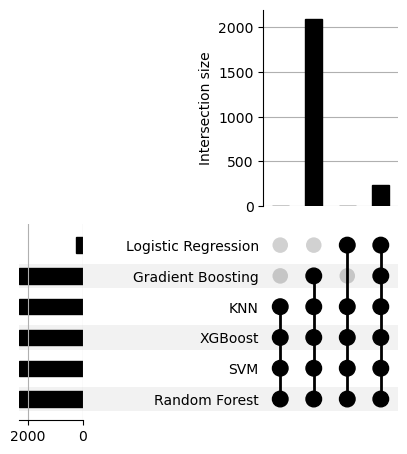

In [16]:
from upsetplot import from_contents, UpSet

upset_data = from_contents(model_top_genes)
UpSet(upset_data).plot()
plt.show()


In [20]:
from collections import Counter
# common_genes = set.intersection(*model_top_genes.values())

# print("所有模型共同的重要基因数量:", len(common_genes))
# print(list(common_genes))

# 统计每个基因在多少个模型中出现
gene_counter = Counter()

for model_name, gene_set in model_top_genes.items():
    gene_counter.update(gene_set)

# 至少在 4 个模型中出现
genes_in_4plus_models = [gene for gene, count in gene_counter.items() if count >= 4]

print("至少 4 个模型认为重要的基因数量:", len(genes_in_4plus_models))
print("示例:", genes_in_4plus_models[:30])


至少 4 个模型认为重要的基因数量: 2330
示例: ['PIP4K2A', 'KPNA2', 'DYNLL2', 'CYP2S1', 'KIF4A', 'NEO1', 'RLIM', 'IHH', 'EIF3E', 'MGAT1', 'ELOVL5', 'OR2I1P', 'GTF2A1', 'AGPAT3', 'LCP2', 'ZNF827', 'IST1', 'DENND2D', 'PLCD3', 'TAOK2', 'PPP2R2A', 'SUB1', 'PTPRG', 'C6orf132', 'SLAIN2', 'HSPH1', 'RMND5A', 'ATXN7L3B', 'TMEM132A', 'COL9A2']


In [ ]:

# ========= 6B. KM 生存分析骨架（需要你有临床信息） =========
# 假设你有一个 clinical_df，index 与 X 的行名一致，包含:
#   'OS_time'（生存时间，单位可为月）,
#   'OS_event'（1=死亡, 0=删失）
# 那么整队列 KM 曲线：
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

km = KaplanMeierFitter()

km.fit(durations=clin["OS_time"], event_observed=clin["OS_event"], label="All patients")
km.plot_survival_function()
plt.title("Overall Survival (TCGA-PAAD)")
plt.xlabel("Days")
plt.ylabel("Survival probability")
plt.show()


In [ ]:

#  单个基因KM 曲线：
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# ========== 0. 参数设置 ==========
# 你想保存图片的文件夹
outdir = "KM_genes_in_4plus_models"
os.makedirs(outdir, exist_ok=True)

# 确保 genes 是 list
genes_list = list(genes_in_4plus_models)

# 只保留 X 和 clin 共有的样本
common_ids = X.index.intersection(clin.index)
X_km = X.loc[common_ids].copy()
clin_km = clin.loc[common_ids].copy()

print(f"共有样本用于 KM 分析: {len(common_ids)}")


# ========== 1. 定义一个函数：对单个基因画 KM ==========
def km_for_gene(gene_name, X_expr, clin_df, outdir=None, min_group_size=10, min_events_per_group=5):
    """
    对单个基因按中位数分组，画 KM 曲线，并进行 log-rank 检验。

    gene_name: 基因名（string）
    X_expr:    表达矩阵（样本×基因）
    clin_df:   临床信息（包含 OS_time, OS_event）
    outdir:    保存图片的目录（如果为 None，则只显示不保存）
    min_group_size: 每组至少需要的样本数
    min_events_per_group: 每组至少需要的事件数（OS_event=1）
    """

    if gene_name not in X_expr.columns:
        print(f"[跳过] {gene_name}: 不在表达矩阵中")
        return None

    # 取该基因表达 & OS 信息
    df = pd.DataFrame({
        "expr": X_expr[gene_name],
        "OS_time": clin_df["OS_time"],
        "OS_event": clin_df["OS_event"],
    }).dropna()

    if df.shape[0] < 2 * min_group_size:
        print(f"[跳过] {gene_name}: 有效样本数太少 ({df.shape[0]})")
        return None

    # 按表达中位数分组
    median_expr = df["expr"].median()
    high_mask = df["expr"] >= median_expr
    low_mask  = df["expr"] <  median_expr

    n_high = high_mask.sum()
    n_low  = low_mask.sum()

    if n_high < min_group_size or n_low < min_group_size:
        print(f"[跳过] {gene_name}: 分组后样本不足 (high={n_high}, low={n_low})")
        return None

    # 每组的事件数
    events_high = df.loc[high_mask, "OS_event"].sum()
    events_low  = df.loc[low_mask,  "OS_event"].sum()

    if events_high < min_events_per_group or events_low < min_events_per_group:
        print(f"[跳过] {gene_name}: 事件数不足 (high_events={events_high}, low_events={events_low})")
        return None

    # ========== KM 拟合 ==========
    kmf_high = KaplanMeierFitter()
    kmf_low  = KaplanMeierFitter()

    T_high = df.loc[high_mask, "OS_time"]
    E_high = df.loc[high_mask, "OS_event"]

    T_low  = df.loc[low_mask,  "OS_time"]
    E_low  = df.loc[low_mask,  "OS_event"]

    # 拟合
    kmf_high.fit(T_high, event_observed=E_high, label=f"{gene_name} High (n={n_high})")
    kmf_low.fit(T_low, event_observed=E_low, label=f"{gene_name} Low (n={n_low})")

    # ========== log-rank 检验 ==========
    lr_res = logrank_test(T_high, T_low, event_observed_A=E_high, event_observed_B=E_low)
    p_value = lr_res.p_value

    # ========== 画图 ==========
    plt.figure(figsize=(6, 5))

    ax = kmf_high.plot_survival_function()
    kmf_low.plot_survival_function(ax=ax)

    plt.title(f"KM by {gene_name} expression\nlog-rank p = {p_value:.3e}")
    plt.xlabel("Days")
    plt.ylabel("Survival probability")

    plt.tight_layout()

    # 保存或显示
    if outdir is not None:
        fname = os.path.join(outdir, f"KM_{gene_name}.png")
        plt.savefig(fname, dpi=300)
        plt.close()
        print(f"[保存] {gene_name}: KM 曲线已保存到 {fname}, p = {p_value:.3e}")
    else:
        plt.show()

    # 返回 p 值等信息，方便后续排序或汇总
    return {
        "gene": gene_name,
        "p": p_value,
        "n_high": n_high,
        "n_low": n_low,
        "events_high": int(events_high),
        "events_low": int(events_low)
    }


# ========== 2. 对 genes_in_4plus_models 批量跑 KM ==========
km_results = []

for g in genes_list:
    res = km_for_gene(g, X_km, clin_km, outdir=outdir)
    if res is not None:
        km_results.append(res)

km_results_df = pd.DataFrame(km_results).sort_values("p")
print("\n===== KM log-rank 结果（按 p 值排序）前 20 个 =====")
print(km_results_df.head(20))

# 如果需要，可以保存结果表
km_results_df.to_csv(os.path.join(outdir, "KM_logrank_results_genes_in_4plus_models.csv"), index=False)


In [ ]:
#  Cox
#  pip install jinja2D第一次跑要运行此代码


cox_df = pd.concat([
    X.loc[common_ids, genes_in_4plus_models],
    clin.loc[common_ids, ["OS_time", "OS_event"]]
], axis=1)

print(cox_df.shape)
print(cox_df["OS_event"].value_counts())

cox = CoxPHFitter(penalizer=0.1)
cox.fit(cox_df, "OS_time", "OS_event")
cox.print_summary()


In [23]:
import gseapy as gp
import pandas as pd
# 至少 4 个模型认为重要的基因
# genes_in_4plus_models 是一个 list 或 set
gene_list = list(genes_in_4plus_models)
print("交集基因数:", len(gene_list))
print(gene_list[:10])

gene_sets = [
    "GO_Biological_Process_2021",
    "GO_Molecular_Function_2021",
    "GO_Cellular_Component_2021",
]

enr = gp.enrichr(
    gene_list=gene_list,
    gene_sets=gene_sets,
    organism="Human",   # 人类
    cutoff=0.05         # 默认以 Adjusted P-value / FDR 过滤
)

# 结果 DataFrame
go_res = enr.results
print(go_res.head())

# 生物学过程（BP）
res_bp = go_res[go_res["Gene_set"] == "GO_Biological_Process_2021"] \
             .sort_values("Adjusted P-value")
# 分子功能（MF）
res_mf = go_res[go_res["Gene_set"] == "GO_Molecular_Function_2021"] \
             .sort_values("Adjusted P-value")
# 细胞组分（CC）
res_cc = go_res[go_res["Gene_set"] == "GO_Cellular_Component_2021"] \
             .sort_values("Adjusted P-value")

print("BP 前10条：")
print(res_bp.head(10)[["Term", "Adjusted P-value", "Overlap", "Genes"]])

def filter_by_overlap(df, min_genes=2):
    """
    过滤掉重叠基因数 < min_genes 的条目。
    min_genes=2 表示至少要命中 2 个基因。
    """
    df = df.copy()
    df["Overlap_gene_count"] = df["Overlap"].apply(lambda x: int(x.split("/")[0]))
    df = df[df["Overlap_gene_count"] >= min_genes]
    return df.drop(columns=["Overlap_gene_count"])
res_bp_filt = filter_by_overlap(res_bp, min_genes=2)
res_mf_filt = filter_by_overlap(res_mf, min_genes=2)
res_cc_filt = filter_by_overlap(res_cc, min_genes=2)

print("过滤后 BP 条目数:", res_bp_filt.shape[0])
print("过滤后 MF 条目数:", res_mf_filt.shape[0])
print("过滤后 CC 条目数:", res_cc_filt.shape[0])

# 导出到文件，方便看表或丢给 R/Excel
res_bp_filt.to_csv("GO_BP_enrich_1stlabel_genes_4plus_models.tsv", sep="\t", index=False)
res_mf_filt.to_csv("GO_MF_enrich_1stlabel_genes_4plus_models.tsv", sep="\t", index=False)
res_cc_filt.to_csv("GO_CC_enrich_1stlabel_genes_4plus_models.tsv", sep="\t", index=False)



交集基因数: 2330
['PIP4K2A', 'KPNA2', 'DYNLL2', 'CYP2S1', 'KIF4A', 'NEO1', 'RLIM', 'IHH', 'EIF3E', 'MGAT1']
                     Gene_set  \
0  GO_Molecular_Function_2021   
1  GO_Molecular_Function_2021   
2  GO_Molecular_Function_2021   
3  GO_Molecular_Function_2021   
4  GO_Molecular_Function_2021   

                                                Term  Overlap       P-value  \
0  collagen-containing extracellular matrix (GO:0...  141/380  1.141752e-38   
1               cell-substrate junction (GO:0030055)  138/394  1.047617e-34   
2                        focal adhesion (GO:0005925)  134/387  3.952385e-33   
3                    actin cytoskeleton (GO:0015629)   96/316  1.855184e-19   
4            secretory granule membrane (GO:0030667)   80/274  2.363330e-15   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      4.863864e-36            0                     0    4.697835   
1      2.231425e-32            0                     0    4.282497   
2      5.6123

In [24]:
res_bp_filt

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
852,GO_Biological_Process_2021,collagen-containing extracellular matrix (GO:0...,141/380,1.141752e-38,4.863864e-36,0,0,4.697835,410.429495,SPON1;SPARC;COL16A1;SERPINE2;SERPINE1;TNC;F13A...
853,GO_Biological_Process_2021,cell-substrate junction (GO:0030055),138/394,1.047617e-34,2.231425e-32,0,0,4.282497,335.068487,NCKAP1;PRAG1;TNC;SLA;ACTB;ICAM1;PPP1CB;GJA1;MP...
854,GO_Biological_Process_2021,focal adhesion (GO:0005925),134/387,3.952385e-33,5.612387e-31,0,0,4.200735,313.420998,NCKAP1;PRAG1;TNC;SLA;ACTB;ICAM1;PPP1CB;GJA1;MP...
855,GO_Biological_Process_2021,actin cytoskeleton (GO:0015629),96/316,1.855184e-19,1.975771e-17,0,0,3.408481,147.011626,CLIC5;CLIC4;FLT1;ONECUT2;WDR1;WIPF1;WIPF2;SLC2...
856,GO_Biological_Process_2021,secretory granule membrane (GO:0030667),80/274,2.363330e-15,1.890633e-13,0,0,3.202932,107.870615,PIGR;MOXD1;SPARC;B4GALT1;ITGAM;SLC44A2;ITGB2;L...
...,...,...,...,...,...,...,...,...,...,...
1271,GO_Biological_Process_2021,potassium channel complex (GO:0034705),3/80,9.967342e-01,9.999687e-01,0,0,0.294560,0.000964,KCNC4;KCNMA1;KCNK1
1274,GO_Biological_Process_2021,mitochondrial membrane (GO:0031966),34/469,9.994453e-01,9.999687e-01,0,0,0.586718,0.000326,UQCRB;MAOB;SLC44A1;MCUB;NDUFA10;PSEN1;SPG7;HK2...
1275,GO_Biological_Process_2021,mitochondrial matrix (GO:0005759),22/348,9.997259e-01,9.999687e-01,0,0,0.507129,0.000139,ACOT9;RNASEL;OAT;AK4;NR3C1;DNAJC15;SOD2;ATP5F1...
1276,GO_Biological_Process_2021,mitochondrial inner membrane (GO:0005743),19/328,9.998987e-01,9.999687e-01,0,0,0.461923,0.000047,UQCRB;NDUFA5;MCUB;NDUFA10;PSEN1;SPG7;ATP5F1E;S...


In [ ]:
# second layer

In [42]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np

try:
    from xgboost import XGBClassifier
    xgb_installed = True
except ImportError:
    xgb_installed = False

# ========= 1. 读取 & 准备数据 =========
filtered_2ndlabel = pd.read_csv("filtered_matrix_2ndlabel.tsv", sep="\t", index_col=0)

# 行: 基因+label, 列: 样本  →  转置后行: 样本, 列: 基因+label
X = filtered_2ndlabel.T.drop(columns=['label']).copy()
y = filtered_2ndlabel.T['label'].copy()

X = X.astype(float)
y = y.astype(str)

print("Label counts:\n", y.value_counts())
print("X shape:", X.shape, " y shape:", y.shape)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=2025, stratify=y_encoded
)

n_classes = len(le.classes_)
print("Classes:", le.classes_, " (n_classes =", n_classes, ")")

# ========= 2. 模型和参数网格 =========
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

if xgb_installed:
    models["XGBoost"] = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',   # 多分类也OK
        random_state=42
    )

param_grids = {
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 5, 10]
    },
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["rbf", "linear"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1]
    },
}

if xgb_installed:
    param_grids["XGBoost"] = {
        "n_estimators": [100, 200],
        "max_depth": [3, 5],
        "learning_rate": [0.05, 0.1]
    }

# 根据分类任务选择合适的 AUC scoring
if n_classes == 2:
    scoring_metric = "roc_auc"
else:
    scoring_metric = "roc_auc_ovr"

trained_models = {}
results = []   # 存每个模型的 acc / auc / best_params

# ========= 3. 训练 + 调参 + 评估 =========
for name, model in models.items():
    print("\n==============================")
    print(f"Searching best params for {name} ...")

    # ---- XGBoost 用 numpy array 避免 pandas 兼容性问题 ----
    if name == "XGBoost":
        X_train_fit = X_train.values
        X_test_fit = X_test.values
    else:
        X_train_fit = X_train
        X_test_fit = X_test

    param_grid = param_grids.get(name, {})

    best_params = None
    if param_grid:
        grid_search = GridSearchCV(
            model,
            param_grid,
            cv=5,
            scoring=scoring_metric,
            n_jobs=-1
        )
        grid_search.fit(X_train_fit, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Best params for {name}: {best_params}")
    else:
        best_model = model.fit(X_train_fit, y_train)

    # 预测
    y_pred = best_model.predict(X_test_fit)
    y_proba = best_model.predict_proba(X_test_fit)

    # 准确率
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Accuracy:", acc)

    # AUC
    auc = np.nan
    try:
        if n_classes == 2:
            y_proba_pos = y_proba[:, 1]
            auc = roc_auc_score(y_test, y_proba_pos)
        else:
            auc = roc_auc_score(
                y_test,
                y_proba,
                multi_class="ovr",
                average="macro"
            )
        print("AUC:", auc)
    except Exception as e:
        print("AUC cannot be computed:", e)

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n",
          classification_report(y_test, y_pred, target_names=le.classes_))

    trained_models[name] = best_model
    results.append({
        "model": name,
        "accuracy": acc,
        "auc": auc,
        "best_params": best_params
    })


Label counts:
 label
1.0    132
0.0     51
Name: count, dtype: int64
X shape: (183, 2331)  y shape: (183,)
Classes: ['0.0' '1.0']  (n_classes = 2 )

Searching best params for Random Forest ...
Best params for Random Forest: {'max_depth': None, 'n_estimators': 100}

Model: Random Forest
Accuracy: 0.7567567567567568
AUC: 0.4962962962962963
Confusion Matrix:
 [[ 1  9]
 [ 0 27]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.10      0.18        10
         1.0       0.75      1.00      0.86        27

    accuracy                           0.76        37
   macro avg       0.88      0.55      0.52        37
weighted avg       0.82      0.76      0.67        37


Searching best params for Logistic Regression ...
Best params for Logistic Regression: {'C': 0.01}

Model: Logistic Regression
Accuracy: 0.7027027027027027
AUC: 0.4444444444444444
Confusion Matrix:
 [[ 0 10]
 [ 1 26]]
Classification Report:
               precision    r

/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

Classification Report:
               precision    recall  f1-score   support

         0.0       0.20      0.10      0.13        10
         1.0       0.72      0.85      0.78        27

    accuracy                           0.65        37
   macro avg       0.46      0.48      0.46        37
weighted avg       0.58      0.65      0.60        37


Searching best params for Gradient Boosting ...
Best params for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 100}

Model: Gradient Boosting
Accuracy: 0.6486486486486487
AUC: 0.5518518518518518
Confusion Matrix:
 [[ 0 10]
 [ 3 24]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.71      0.89      0.79        27

    accuracy                           0.65        37
   macro avg       0.35      0.44      0.39        37
weighted avg       0.52      0.65      0.57        37


Searching best params for XGBoost ...


/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [15:27:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [15:27:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [15:27:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [15:27:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

Best params for XGBoost: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

Model: XGBoost
Accuracy: 0.7027027027027027
AUC: 0.6444444444444444
Confusion Matrix:
 [[ 0 10]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.72      0.96      0.83        27

    accuracy                           0.70        37
   macro avg       0.36      0.48      0.41        37
weighted avg       0.53      0.70      0.60        37



In [44]:

# ========= 4. 汇总各模型表现 & 选择一个用于后续分析 =========
results_df = pd.DataFrame(results)
print("\n===== Model performance summary =====")
print(results_df.sort_values("auc", ascending=False))

# 选 AUC 最高的模型（如果有 NaN，会自动排到后面）
best_row = results_df.sort_values("auc", ascending=False).iloc[0]
best_model_name = best_row["model"]
best_model = trained_models[best_model_name]
print(f"\n>>> Best model (by AUC): {best_model_name}  (AUC={best_row['auc']})")

# ========= 5. 找出“错分样本” =========
# 注意：这里要重新用 best_model 做一次预测
if best_model_name == "XGBoost":
    X_test_for_best = X_test.values
else:
    X_test_for_best = X_test

y_test_pred_best = best_model.predict(X_test_for_best)

mis_mask = (y_test_pred_best != y_test)
mis_idx = X_test.index[mis_mask]

print(f"\nNumber of misclassified samples for {best_model_name}: {mis_mask.sum()}")

# 拿到错分样本的特征 & 真实标签 & 预测标签（编码 & 原始 Label）
X_mis = X_test.loc[mis_idx]
y_mis_true_enc = y_test[mis_mask]
y_mis_pred_enc = y_test_pred_best[mis_mask]

y_mis_true = le.inverse_transform(y_mis_true_enc)
y_mis_pred = le.inverse_transform(y_mis_pred_enc)

misclassified_df = pd.DataFrame({
    "true_label_enc": y_mis_true_enc,
    "pred_label_enc": y_mis_pred_enc,
    "true_label": y_mis_true,
    "pred_label": y_mis_pred,
}, index=mis_idx)

print("\n===== Misclassified samples (head) =====")
print(misclassified_df.head())

# 如果你想保存
# misclassified_df.to_csv("misclassified_samples_best_model.csv")




===== Model performance summary =====
                 model  accuracy       auc  \
5              XGBoost  0.702703  0.644444   
4    Gradient Boosting  0.648649  0.551852   
2                  SVM  0.729730  0.522222   
0        Random Forest  0.756757  0.496296   
3                  KNN  0.648649  0.470370   
1  Logistic Regression  0.702703  0.444444   

                                         best_params  
5  {'learning_rate': 0.05, 'max_depth': 5, 'n_est...  
4        {'learning_rate': 0.1, 'n_estimators': 100}  
2                          {'C': 1, 'kernel': 'rbf'}  
0           {'max_depth': None, 'n_estimators': 100}  
3                                 {'n_neighbors': 5}  
1                                        {'C': 0.01}  

>>> Best model (by AUC): XGBoost  (AUC=0.6444444444444444)

Number of misclassified samples for XGBoost: 11

===== Misclassified samples (head) =====
                  true_label_enc  pred_label_enc true_label pred_label
TCGA-2L-AAQL-01A               


Running SHAP for model: XGBoost


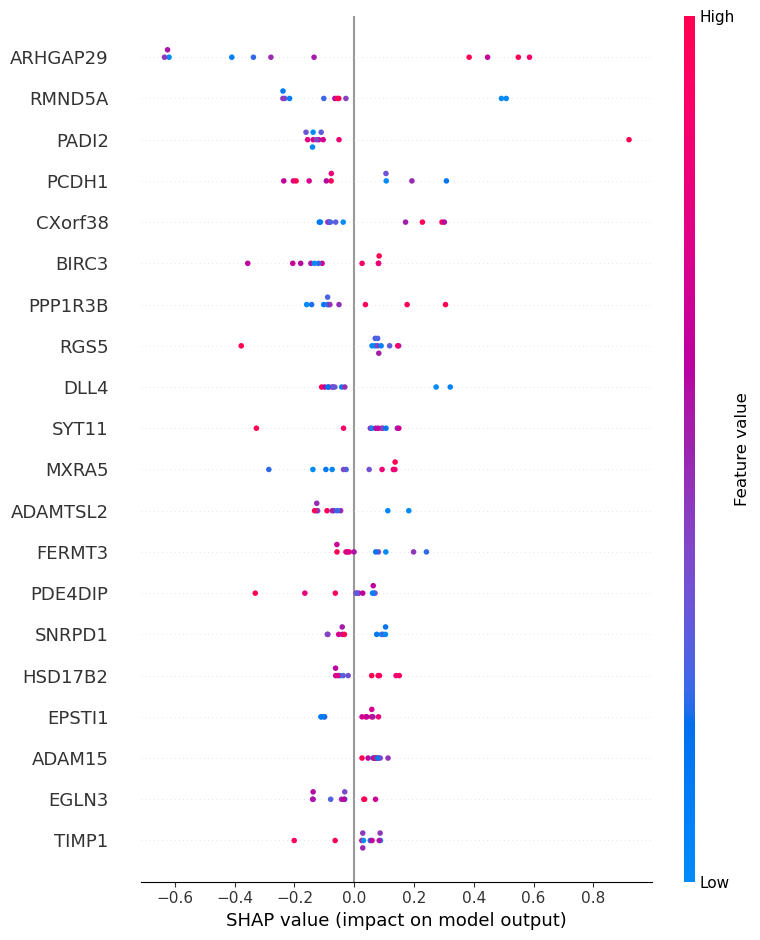

In [45]:

# ========= 6A. SHAP 分析骨架（优先推荐） =========
# pip install shap  之后再启用下面代码
try:
    import shap

    print(f"\nRunning SHAP for model: {best_model_name}")

    # 只对树模型用 TreeExplainer，比 KernelExplainer 快很多
    if best_model_name in ["Random Forest", "Gradient Boosting", "XGBoost"]:
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_test_for_best)

        # ---- 针对错分样本 subset 的 SHAP ----
        # 二分类：shap_values 是 (n_samples, n_features)
        # 多分类：shap_values 是 list，长度 = n_classes
        if n_classes == 2:
            shap_mis = shap_values[mis_mask]
            X_mis_array = X_test_for_best[mis_mask]
        else:
            # 多分类：取“预测类别”的 SHAP
            shap_all = []
            for i, cls in enumerate(y_test_pred_best):
                shap_all.append(shap_values[cls][i])
            shap_all = np.array(shap_all)
            shap_mis = shap_all[mis_mask]
            X_mis_array = X_test_for_best[mis_mask]

        # 汇总图：看哪几个基因在错分样本中贡献大
        shap.summary_plot(
            shap_mis,
            X_mis_array,
            feature_names=X.columns,
            show=False  # 在 notebook 里可以去掉
        )

        # 你也可以对单个错分病人画 force_plot / bar_plot
        # shap.force_plot(explainer.expected_value, shap_mis[0, :], X_mis_array[0, :])

    else:
        print("Best model is not tree-based; SHAP 也可以做，但建议用 KernelExplainer（会比较慢）。")

except ImportError:
    print("shap is not installed. Run `pip install shap` if you want SHAP analysis.")


In [118]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter

# ========== 1. clinical_df 用 id 做 index，并对齐到表达矩阵 X ==========

# 如果还没设 index：
clinical_df = pd.read_csv("TCGA-PAAD.clinical.tsv", sep="\t")
clinical_df = clinical_df.set_index("sample")
clin = clinical_df.copy()

# =============================
# 1. 构建 OS_event
# =============================
clin["OS_event"] = (clin["vital_status.demographic"].str.lower() == "dead").astype(int)

# =============================
# 2. 构建 OS_time
# =============================

clin["days_to_death"] = pd.to_numeric(clin["days_to_death.demographic"], errors="coerce")
clin["days_to_followup"] = pd.to_numeric(clin["days_to_last_follow_up.diagnoses"], errors="coerce")

# dead → use days_to_death
# alive → use days_to_last_follow_up
clin["OS_time"] = clin["days_to_death"].fillna(clin["days_to_followup"])

print(clin[["vital_status.demographic", "days_to_death", "days_to_followup", "OS_event", "OS_time"]].head(20))
print("\n生存事件计数(OS_event):\n", clin["OS_event"].value_counts())
print("缺失 OS_time 的样本数:", clin["OS_time"].isna().sum())


common_ids = X.index.intersection(clin.index)

                 vital_status.demographic  days_to_death  days_to_followup  \
sample                                                                       
TCGA-HZ-7918-01A                    Alive            NaN             969.0   
TCGA-3A-A9IS-01A                    Alive            NaN             998.0   
TCGA-HZ-7924-01A                    Alive            NaN             840.0   
TCGA-IB-AAUW-01A                     Dead          230.0             179.0   
TCGA-2J-AABP-01A                    Alive            NaN             463.0   
TCGA-2L-AAQM-01A                    Alive            NaN            1383.0   
TCGA-3A-A9IO-01A                    Alive            NaN            1942.0   
TCGA-US-A77J-01A                     Dead          568.0               NaN   
TCGA-3A-A9IV-01A                    Alive            NaN            1103.0   
TCGA-3A-A9IR-01A                    Alive            NaN            1542.0   
TCGA-IB-7654-01A                     Dead          476.0        

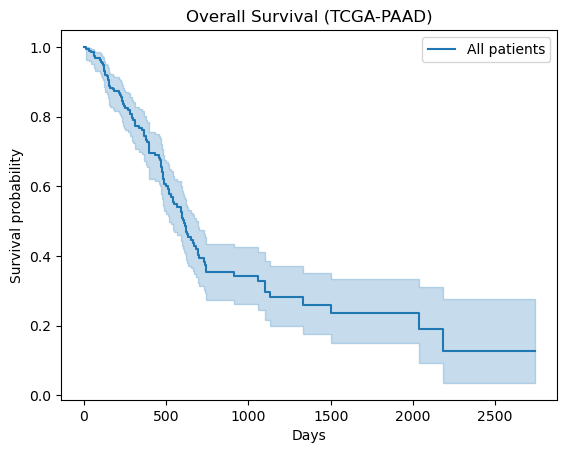

In [ ]:

# ========= 6B. KM 生存分析骨架（需要你有临床信息） =========
# 假设你有一个 clinical_df，index 与 X 的行名一致，包含:
#   'OS_time'（生存时间，单位可为月）,
#   'OS_event'（1=死亡, 0=删失）
# 那么整队列 KM 曲线：
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

km = KaplanMeierFitter()

km.fit(durations=clin["OS_time"], event_observed=clin["OS_event"], label="All patients")
km.plot_survival_function()
plt.title("Overall Survival (TCGA-PAAD)")
plt.xlabel("Days")
plt.ylabel("Survival probability")
plt.show()


共有样本用于 KM 分析: 183
[保存] RGS4: KM 曲线已保存到 KM_genes_in_4plus_models/KM_RGS4.png, p = 1.656e-01
[保存] CCL20: KM 曲线已保存到 KM_genes_in_4plus_models/KM_CCL20.png, p = 4.874e-01

===== KM log-rank 结果（按 p 值排序）前 20 个 =====
    gene         p  n_high  n_low  events_high  events_low
0   RGS4  0.165611      92     91           46          49
1  CCL20  0.487353      92     91           50          45


In [ ]:

from sklearn.inspection import permutation_importance

# -------- 基础信息 --------
feature_names = pd.Index(X.columns)

print("是否有重复基因名:", feature_names.duplicated().any())
if feature_names.duplicated().any():
    dup_genes = feature_names[feature_names.duplicated()].unique()
    print("重复基因示例:", dup_genes[:10])

# 二分类 / 多分类，选择合适 scoring
n_classes = len(le.classes_)
if n_classes == 2:
    scoring_metric = "roc_auc"
else:
    scoring_metric = "roc_auc_ovr"

importance_dict = {}  # {model_name: Series(importance, index=gene)}

for name, model in trained_models.items():
    print(f"\nProcessing feature importance for: {name}")
    imp = None

    # 1) 树模型：RF, GB, XGB
    if hasattr(model, "feature_importances_"):
        print("  -> use feature_importances_")
        imp = model.feature_importances_

    # 2) 线性模型：LogisticRegression, 线性SVM（有 coef_）
    elif hasattr(model, "coef_"):
        print("  -> use coef_ as importance")
        coef = model.coef_
        if coef.ndim == 2:
            imp = np.mean(np.abs(coef), axis=0)
        else:
            imp = np.abs(coef.ravel())

    # 3) 其他（比如 rbf SVM, KNN）：用 permutation importance
    else:
        print("  -> use permutation_importance")
        result = permutation_importance(
            model,
            X_test,
            y_test,
            n_repeats=20,
            random_state=42,
            n_jobs=-1,
            scoring=scoring_metric,
        )
        imp = result.importances_mean

    # ---- 构造 Series，index = 基因名 ----
    s = pd.Series(imp, index=feature_names, name=name)

    # 如果基因名有重复，对重复基因做合并（这里取平均）
    if s.index.duplicated().any():
        s = s.groupby(level=0).mean()

    # 归一化（方便不同模型比较）
    if s.sum() != 0:
        s = s / s.sum()

    # 统一按从大到小排序
    s = s.sort_values(ascending=False)
    importance_dict[name] = s

    print("  Top 5 genes for this model:")
    print(s.head(5))

# -------- 汇总到一个 DataFrame：行=模型，列=基因 --------
importance_df = pd.DataFrame(importance_dict).T   # shape: (n_models, n_unique_genes)
print("\nimportance_df shape:", importance_df.shape)
importance_df.to_csv("PAAD_2nd_feature_importances.tsv", sep="\t")

# # -------- 跨模型平均重要性 --------
# gene_importance_mean = importance_df.mean(axis=0)  # 对每个基因跨模型取平均
# gene_importance_mean_sorted = gene_importance_mean.sort_values(ascending=False)

# print("\nTop 20 genes (mean importance across models):")
# print(gene_importance_mean_sorted.head(20))

# # -------- 选前 10% 重要基因 --------
# threshold = gene_importance_mean.quantile(0.9)   # 前 10% 的分位数
# important_genes = gene_importance_mean[gene_importance_mean >= threshold].index.tolist()

# print(f"\n总基因数: {len(gene_importance_mean)}")
# print(f"Top 10% 阈值: {threshold}")
# print(f"重要基因数量 (前10%): {len(important_genes)}")
# print("前 20 个重要基因:")
# print(important_genes[:20])

# # -------- 保存结果，方便下游富集分析 --------
# gene_importance_mean_sorted.to_csv(
#     "PAAD_gene_importance_mean_6models.tsv",
#     sep="\t"
# )

# pd.Series(important_genes, name="gene").to_csv(
#     "PAAD_important_genes_top10percent_6models.txt",
#     index=False,
#     header=False
# )


是否有重复基因名: True
重复基因示例: Index(['RGS5'], dtype='object')

Processing feature importance for: Random Forest
  -> use feature_importances_
  Top 5 genes for this model:
SYT11     0.007545
RAB3B     0.007149
ADAM15    0.005493
DMBT1     0.005214
TRPM4     0.005025
Name: Random Forest, dtype: float64

Processing feature importance for: Logistic Regression
  -> use coef_ as importance
  Top 5 genes for this model:
S100A2      0.004081
CHGB        0.003903
DMBT1       0.003778
PAX8-AS1    0.003559
KRT23       0.003204
Name: Logistic Regression, dtype: float64

Processing feature importance for: SVM
  -> use permutation_importance
  Top 5 genes for this model:
RPS4Y1     0.017514
AQP5       0.012878
KLK6       0.012106
PPY        0.012106
SLC6A14    0.011590
Name: SVM, dtype: float64

Processing feature importance for: KNN
  -> use permutation_importance
  Top 5 genes for this model:
PNLIP     0.037601
RPS4Y1    0.035452
CLPS      0.026732
OLFM4     0.026163
ERN2      0.025594
Name: KNN, dtype:

In [50]:
# -------- 对每个模型取前 10% 的重要基因 --------
model_top_genes = {}  # {model_name: set(genes)}

for name, s in importance_dict.items():
    # s 是某个模型的 Series：index=gene, value=importance (已归一化)
    # 确保是从大到小排序的，如果上面没排序可以加一行：
    s_sorted = s.sort_values(ascending=False)

    # 该模型自己的 90% 分位数阈值
    thr = s_sorted.quantile(0.9)

    top_genes = s_sorted[s_sorted >= thr].index
    model_top_genes[name] = set(top_genes)

    print(f"{name}: top 10% 基因数 = {len(top_genes)}")

# 你可以看一下某个模型的前几个基因
for name, genes in model_top_genes.items():
    print(f"\n{name} top genes 示例:")
    print(list(genes)[:10])


Random Forest: top 10% 基因数 = 233
Logistic Regression: top 10% 基因数 = 233
SVM: top 10% 基因数 = 250
KNN: top 10% 基因数 = 233
Gradient Boosting: top 10% 基因数 = 233
XGBoost: top 10% 基因数 = 233

Random Forest top genes 示例:
['LILRB4', 'COPA', 'CELSR3', 'RGS4', 'CCL20', 'MYO1D', 'CEP250', 'EPS8L3', 'DYNLL2', 'TTYH3']

Logistic Regression top genes 示例:
['AXL', 'VSTM2L', 'SLC5A1', 'RGS4', 'TGFBI', 'CCL20', 'MXRA5', 'MYO1D', 'TMEM119', 'HK2']

SVM top genes 示例:
['VSTM2L', 'SLC5A1', 'RGS4', 'TGFBI', 'CCL20', 'MXRA5', 'CRISP3', 'WNT7A', 'F2RL2', 'FOXL1']

KNN top genes 示例:
['AXL', 'PLEKHA6', 'SLC5A1', 'ANKS4B', 'DCBLD2', 'GPRIN3', 'CCL20', 'BCAR3', 'CRISP3', 'FOXL1']

Gradient Boosting top genes 示例:
['CCL20', 'SAMD4A', 'MXRA5', 'KPNA2', 'PPP6R1', 'KIF3C', 'TMEM8B', 'FERMT3', 'C6orf223', 'DLL4']

XGBoost top genes 示例:
['RGS4', 'CCL20', 'MXRA5', 'HS3ST1', 'KPNA2', 'EPS8L3', 'C6orf223', 'FERMT3', 'TTYH3', 'FOXL1']


/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/administration/miniforge3/envs/dl/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  s

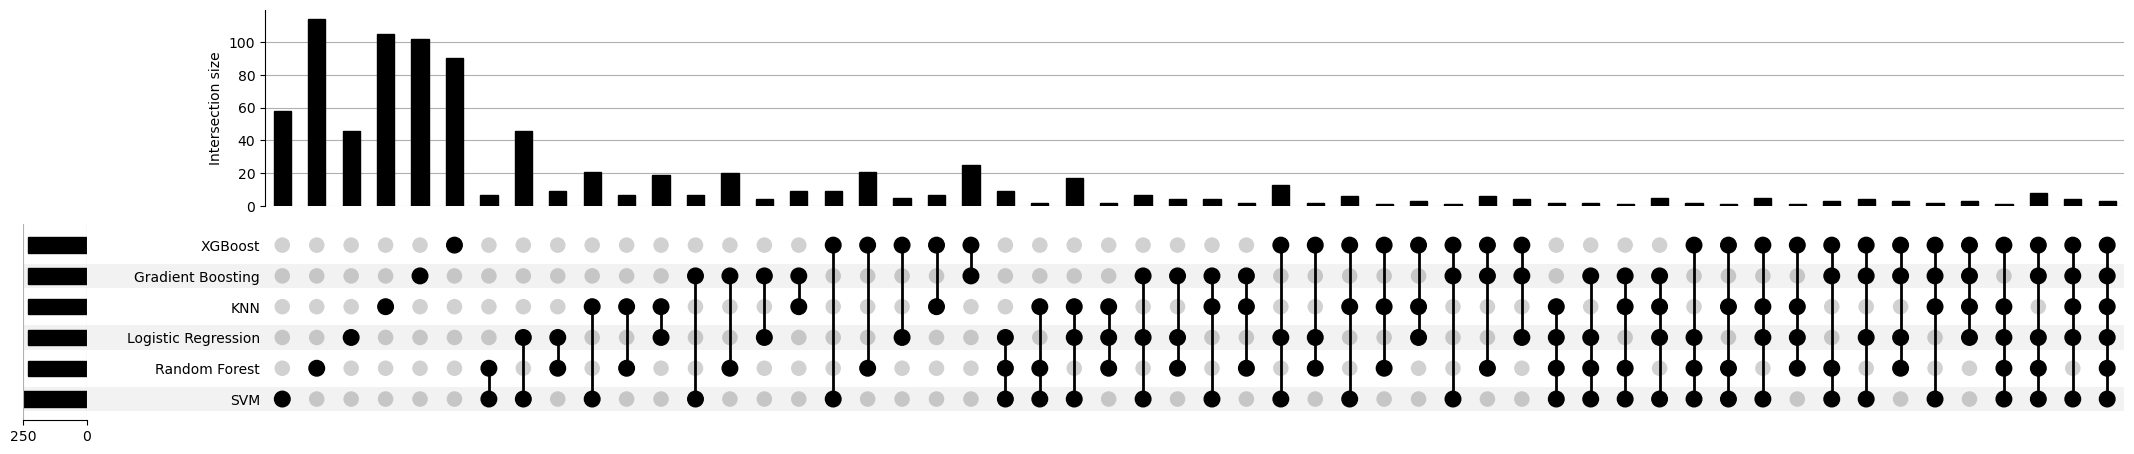

In [51]:
from upsetplot import from_contents, UpSet
# import matplotlib.pyplot as plt
# from matplotlib_venn import venn2, venn3

# # 例如你想看 Random Forest, XGBoost, SVM 三个模型
# models_for_venn = ["Random Forest", "XGBoost", "SVM"]

# sets = [model_top_genes[m] for m in models_for_venn]

# plt.figure(figsize=(6, 6))

# if len(models_for_venn) == 2:
#     venn2(subsets=sets, set_labels=models_for_venn)
# elif len(models_for_venn) == 3:
#     venn3(subsets=sets, set_labels=models_for_venn)
# else:
#     raise ValueError("Venn 只能画 2 或 3 个集合，请调整 models_for_venn 的长度。")

# plt.title("Top 10% important genes overlap")
# plt.show()

upset_data = from_contents(model_top_genes)
UpSet(upset_data).plot()
plt.show()


In [52]:
from collections import Counter
# common_genes = set.intersection(*model_top_genes.values())

# print("所有模型共同的重要基因数量:", len(common_genes))
# print(list(common_genes))

# 统计每个基因在多少个模型中出现
gene_counter = Counter()

for model_name, gene_set in model_top_genes.items():
    gene_counter.update(gene_set)

# 至少在 4 个模型中出现
genes_in_4plus_models = [gene for gene, count in gene_counter.items() if count >= 4]

print("至少 4 个模型认为重要的基因数量:", len(genes_in_4plus_models))
print("示例:", genes_in_4plus_models[:30])


至少 4 个模型认为重要的基因数量: 50
示例: ['RGS4', 'CCL20', 'FOXL1', 'RAB3B', 'KRT23', 'RGS5', 'CHGB', 'CXCL8', 'EPSTI1', 'IFIT1', 'NPR3', 'CEACAM6', 'S100A6', 'SYT11', 'ARHGAP29', 'TM4SF1', 'LCN2', 'B4GALT4', 'DMBT1', 'EPHB2', 'SFRP1', 'CDK14', 'PCSK2', 'BNIP5', 'IGHG1', 'FADS2', 'SULT1B1', 'MXRA5', 'ASS1', 'CDH17']


In [ ]:
import os
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# ========== 0. 参数设置 ==========
# 你想保存图片的文件夹
outdir = "KM_genes_in_4plus_models"
os.makedirs(outdir, exist_ok=True)

# 确保 genes 是 list
genes_list = list(genes_in_4plus_models)

# 只保留 X 和 clin 共有的样本
common_ids = X.index.intersection(clin.index)
X_km = X.loc[common_ids].copy()
clin_km = clin.loc[common_ids].copy()

print(f"共有样本用于 KM 分析: {len(common_ids)}")


# ========== 1. 定义一个函数：对单个基因画 KM ==========
def km_for_gene(gene_name, X_expr, clin_df, outdir=None, min_group_size=10, min_events_per_group=5):
    """
    对单个基因按中位数分组，画 KM 曲线，并进行 log-rank 检验。

    gene_name: 基因名（string）
    X_expr:    表达矩阵（样本×基因）
    clin_df:   临床信息（包含 OS_time, OS_event）
    outdir:    保存图片的目录（如果为 None，则只显示不保存）
    min_group_size: 每组至少需要的样本数
    min_events_per_group: 每组至少需要的事件数（OS_event=1）
    """

    if gene_name not in X_expr.columns:
        print(f"[跳过] {gene_name}: 不在表达矩阵中")
        return None

    # 取该基因表达 & OS 信息
    df = pd.DataFrame({
        "expr": X_expr[gene_name],
        "OS_time": clin_df["OS_time"],
        "OS_event": clin_df["OS_event"],
    }).dropna()

    if df.shape[0] < 2 * min_group_size:
        print(f"[跳过] {gene_name}: 有效样本数太少 ({df.shape[0]})")
        return None

    # 按表达中位数分组
    median_expr = df["expr"].median()
    high_mask = df["expr"] >= median_expr
    low_mask  = df["expr"] <  median_expr

    n_high = high_mask.sum()
    n_low  = low_mask.sum()

    if n_high < min_group_size or n_low < min_group_size:
        print(f"[跳过] {gene_name}: 分组后样本不足 (high={n_high}, low={n_low})")
        return None

    # 每组的事件数
    events_high = df.loc[high_mask, "OS_event"].sum()
    events_low  = df.loc[low_mask,  "OS_event"].sum()

    if events_high < min_events_per_group or events_low < min_events_per_group:
        print(f"[跳过] {gene_name}: 事件数不足 (high_events={events_high}, low_events={events_low})")
        return None

    # ========== KM 拟合 ==========
    kmf_high = KaplanMeierFitter()
    kmf_low  = KaplanMeierFitter()

    T_high = df.loc[high_mask, "OS_time"]
    E_high = df.loc[high_mask, "OS_event"]

    T_low  = df.loc[low_mask,  "OS_time"]
    E_low  = df.loc[low_mask,  "OS_event"]

    # 拟合
    kmf_high.fit(T_high, event_observed=E_high, label=f"{gene_name} High (n={n_high})")
    kmf_low.fit(T_low, event_observed=E_low, label=f"{gene_name} Low (n={n_low})")

    # ========== log-rank 检验 ==========
    lr_res = logrank_test(T_high, T_low, event_observed_A=E_high, event_observed_B=E_low)
    p_value = lr_res.p_value

    # ========== 画图 ==========
    plt.figure(figsize=(6, 5))

    ax = kmf_high.plot_survival_function()
    kmf_low.plot_survival_function(ax=ax)

    plt.title(f"KM by {gene_name} expression\nlog-rank p = {p_value:.3e}")
    plt.xlabel("Days")
    plt.ylabel("Survival probability")

    plt.tight_layout()

    # 保存或显示
    if outdir is not None:
        fname = os.path.join(outdir, f"KM_{gene_name}.png")
        plt.savefig(fname, dpi=300)
        plt.close()
        print(f"[保存] {gene_name}: KM 曲线已保存到 {fname}, p = {p_value:.3e}")
    else:
        plt.show()

    # 返回 p 值等信息，方便后续排序或汇总
    return {
        "gene": gene_name,
        "p": p_value,
        "n_high": n_high,
        "n_low": n_low,
        "events_high": int(events_high),
        "events_low": int(events_low)
    }


# ========== 2. 对 genes_in_4plus_models 批量跑 KM ==========
km_results = []

for g in genes_list:
    res = km_for_gene(g, X_km, clin_km, outdir=outdir)
    if res is not None:
        km_results.append(res)

km_results_df = pd.DataFrame(km_results).sort_values("p")
print("\n===== KM log-rank 结果（按 p 值排序）前 20 个 =====")
print(km_results_df.head(20))

# 如果需要，可以保存结果表
km_results_df.to_csv(os.path.join(outdir, "KM_logrank_results_genes_in_4plus_models.csv"), index=False)


In [ ]:
#  Cox
#  pip install jinja2D第一次跑要运行此代码


cox_df = pd.concat([
    X.loc[common_ids, genes_in_4plus_models],
    clin.loc[common_ids, ["OS_time", "OS_event"]]
], axis=1)

print(cox_df.shape)
print(cox_df["OS_event"].value_counts())

cox = CoxPHFitter(penalizer=0.1)
cox.fit(cox_df, "OS_time", "OS_event")
cox.print_summary()


<lifelines.CoxPHFitter: fitted with 183 total observations, 88 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS_event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 183
number of events observed = 95
   partial log-likelihood = -395.01
         time fit was run = 2025-12-10 06:58:00 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
RGS4      -0.11      0.90      0.10           -0.30            0.09                0.74                1.10
CCL20      0.01      1.01      0.07           -0.12            0.13                0.89                1.14
FOXL1     -0.05      0.95      0.08           -0.21            0.11                0.81                1.11
RAB3B      0.03      1.03      0.10           -0.17            0.22                0.85                1.24
KRT23     -0.08      0.93      0.06           -0.20            0.04                0.82                1.04
RGS5       0.01      1.01      0.15           -0.27            0.30                0.76                1.35
RGS5      -0.12      0.89      0.20           -0.52            0.28                0.60                1.32
RGS5       0.01      1.01      0.15           -0.27            0.30                0.76                1.35
RGS5      -0.12      0.89      0.20           -0.52            0.28                0.60                1.32
CHGB      -0.03      0.97      0.06           -0.14            0.08                0.87                1.08
CXCL8      0.10      1.10      0.08           -0.05            0.25                0.95                1.28
EPSTI1     0.22      1.25      0.14           -0.05            0.50                0.95                1.65
IFIT1     -0.04      0.96      0.09           -0.22            0.14                0.80                1.15
NPR3      -0.03      0.97      0.08           -0.20            0.13                0.82                1.14
CEACAM6    0.02      1.02      0.06           -0.10            0.13                0.90                1.14
S100A6    -0.03      0.97      0.14           -0.30            0.24                0.74                1.28
SYT11     -0.13      0.87      0.13           -0.40            0.13                0.67                1.14
ARHGAP29   0.20      1.23      0.14           -0.07            0.48                0.93                1.62
TM4SF1     0.14      1.15      0.13           -0.12            0.39                0.88                1.48
LCN2       0.03      1.03      0.06           -0.08            0.15                0.92                1.16
B4GALT4   -0.17      0.84      0.18           -0.53            0.19                0.59                1.20
DMBT1     -0.06      0.94      0.04           -0.15            0.02                0.86                1.02
EPHB2     -0.08      0.92      0.11           -0.30            0.13                0.74                1.14
SFRP1     -0.08      0.92      0.06           -0.21            0.04                0.81                1.04
CDK14      0.18      1.20      0.14           -0.08            0.45                0.92                1.57
PCSK2      0.03      1.03      0.05           -0.07            0.14                0.93                1.15
BNIP5     -0.06      0.95      0.07           -0.19            0.07                0.83                1.08
IGHG1     -0.02      0.98      0.06           -0.13            0.09                0.88                1.09
FADS2     -0.09      0.92      0.13           -0.33            0.16                0.72                1.17
SULT1B1    0.03      1.03      0.06           -0.08            0.14                0.92                1.15
MXRA5      0.01      1.01      0.10           -0.19            0.21                0.82                1.23
ASS1       

In [33]:
import gseapy as gp
import pandas as pd
# 至少 4 个模型认为重要的基因
# genes_in_4plus_models 是一个 list 或 set
gene_list = list(genes_in_4plus_models)
print("交集基因数:", len(gene_list))
print(gene_list[:10])

gene_sets = [
    "GO_Biological_Process_2021",
    "GO_Molecular_Function_2021",
    "GO_Cellular_Component_2021",
]

enr = gp.enrichr(
    gene_list=gene_list,
    gene_sets=gene_sets,
    organism="Human",   # 人类
    cutoff=0.05         # 默认以 Adjusted P-value / FDR 过滤
)

# 结果 DataFrame
go_res = enr.results
print(go_res.head())

# 生物学过程（BP）
res_bp = go_res[go_res["Gene_set"] == "GO_Biological_Process_2021"] \
             .sort_values("Adjusted P-value")
# 分子功能（MF）
res_mf = go_res[go_res["Gene_set"] == "GO_Molecular_Function_2021"] \
             .sort_values("Adjusted P-value")
# 细胞组分（CC）
res_cc = go_res[go_res["Gene_set"] == "GO_Cellular_Component_2021"] \
             .sort_values("Adjusted P-value")

print("BP 前10条：")
print(res_bp.head(10)[["Term", "Adjusted P-value", "Overlap", "Genes"]])

def filter_by_overlap(df, min_genes=2):
    """
    过滤掉重叠基因数 < min_genes 的条目。
    min_genes=2 表示至少要命中 2 个基因。
    """
    df = df.copy()
    df["Overlap_gene_count"] = df["Overlap"].apply(lambda x: int(x.split("/")[0]))
    df = df[df["Overlap_gene_count"] >= min_genes]
    return df.drop(columns=["Overlap_gene_count"])
res_bp_filt = filter_by_overlap(res_bp, min_genes=2)
res_mf_filt = filter_by_overlap(res_mf, min_genes=2)
res_cc_filt = filter_by_overlap(res_cc, min_genes=2)

print("过滤后 BP 条目数:", res_bp_filt.shape[0])
print("过滤后 MF 条目数:", res_mf_filt.shape[0])
print("过滤后 CC 条目数:", res_cc_filt.shape[0])

# 导出到文件，方便看表或丢给 R/Excel
res_bp_filt.to_csv("GO_BP_enrich_2ndlabel_genes_4plus_models.tsv", sep="\t", index=False)
res_mf_filt.to_csv("GO_MF_enrich_2ndlabel_genes_4plus_models.tsv", sep="\t", index=False)
res_cc_filt.to_csv("GO_CC_enrich_2ndlabel_genes_4plus_models.tsv", sep="\t", index=False)



交集基因数: 50
['RGS4', 'CCL20', 'FOXL1', 'RAB3B', 'KRT23', 'RGS5', 'CHGB', 'CXCL8', 'EPSTI1', 'IFIT1']
                     Gene_set                                   Term Overlap  \
0  GO_Biological_Process_2021           zymogen granule (GO:0042588)     1/6   
1  GO_Biological_Process_2021  zymogen granule membrane (GO:0042589)     1/6   
2  GO_Biological_Process_2021        inhibitory synapse (GO:0060077)     1/8   
3  GO_Biological_Process_2021        phagocytic vesicle (GO:0045335)   2/100   
4  GO_Biological_Process_2021           early phagosome (GO:0032009)    1/12   

    P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0  0.014908            0.3256            0                     0   81.408163   
1  0.014908            0.3256            0                     0   81.408163   
2  0.019829            0.3256            0                     0   58.142857   
3  0.025949            0.3256            0                     0    8.440476   
4  0.029599         